### 1.) Importing the libraries

In [2]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder , OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import pickle 
import seaborn as sns
import matplotlib.pyplot as plt

### 2.) read the data set and create df

In [3]:
df = pd.read_csv("taxi_trip_pricing.csv")

### 3.) DOMAIN ANALYSIS

In [4]:
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


### 4.) BASIC CHECK (info / describe / check null)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [6]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


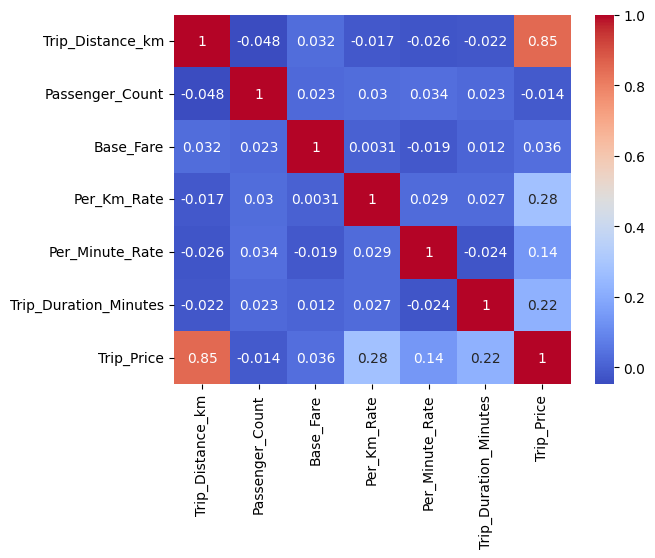

In [7]:
corr_column = ['Trip_Distance_km','Passenger_Count','Base_Fare','Per_Km_Rate','Per_Minute_Rate','Trip_Duration_Minutes','Trip_Price']

#using heatmap

sns.heatmap(df[corr_column].corr(), annot=True, cmap='coolwarm')
plt.show()

In [8]:
df.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

### 5.) OUTLIERS USING DATA VIZ (SNS.BOXPLOT)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Trip_Distance_km'),
  Text(1, 0, 'Passenger_Count'),
  Text(2, 0, 'Base_Fare'),
  Text(3, 0, 'Per_Km_Rate'),
  Text(4, 0, 'Per_Minute_Rate'),
  Text(5, 0, 'Trip_Duration_Minutes'),
  Text(6, 0, 'Trip_Price')])

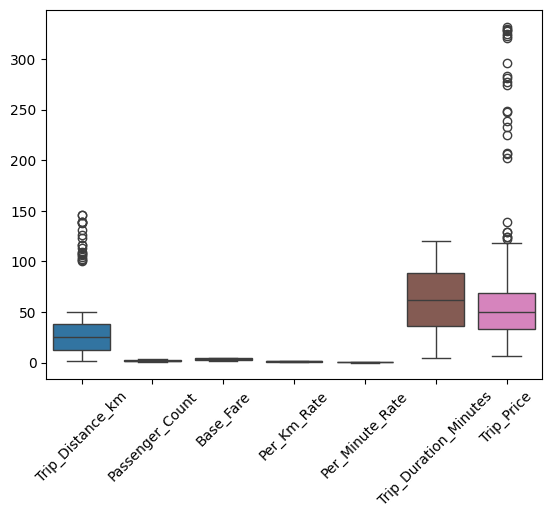

In [9]:
sns.boxplot(df[corr_column])
plt.xticks(rotation=45)

### handle OUTliers

In [10]:
# handle OUTliers with IQR
Q1 = df['Trip_Distance_km'].quantile(0.25)
Q3 = df['Trip_Distance_km'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)

upper_bound = Q3 + (1.5 * IQR)

Q1,Q3,IQR,lower_bound,upper_bound

(np.float64(12.6325),
 np.float64(38.405),
 np.float64(25.7725),
 np.float64(-26.026249999999997),
 np.float64(77.06375))

In [11]:
df.loc[df['Trip_Distance_km']>76,"Trip_Distance_km"]=df['Trip_Distance_km'].median()


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Trip_Distance_km'),
  Text(1, 0, 'Passenger_Count'),
  Text(2, 0, 'Base_Fare'),
  Text(3, 0, 'Per_Km_Rate'),
  Text(4, 0, 'Per_Minute_Rate'),
  Text(5, 0, 'Trip_Duration_Minutes'),
  Text(6, 0, 'Trip_Price')])

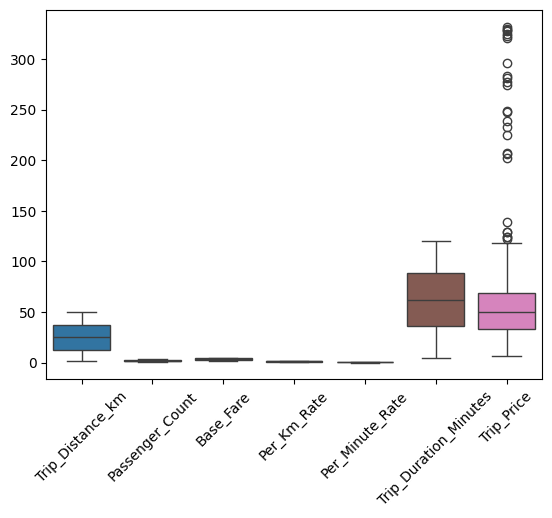

In [12]:
sns.boxplot(df[corr_column])
plt.xticks(rotation=45)

### Define two columns Cate/nume for simple imputer for null values

In [13]:
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


In [14]:
cate_null = ['Time_of_Day','Day_of_Week','Traffic_Conditions','Weather']
num_null = ['Trip_Distance_km','Passenger_Count','Base_Fare','Per_Km_Rate','Per_Minute_Rate','Trip_Duration_Minutes']


In [15]:
df.Time_of_Day.value_counts()  # OHE 

Time_of_Day
Afternoon    371
Morning      283
Evening      203
Night         93
Name: count, dtype: int64

In [16]:
df.Day_of_Week.value_counts() # OHE

Day_of_Week
Weekday    655
Weekend    295
Name: count, dtype: int64

In [17]:
df.Traffic_Conditions.value_counts() # Ordinal 

Traffic_Conditions
Low       397
Medium    371
High      182
Name: count, dtype: int64

In [18]:
df.Weather.value_counts() # OHE

Weather
Clear    667
Rain     227
Snow      56
Name: count, dtype: int64

In [19]:
OHE_columns = ['Day_of_Week','Weather','Time_of_Day']
ordinal_columns = ['Traffic_Conditions']
scalling_columns = ['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes']

In [20]:
# because we are using ordinal we need to assign order
ordinal_order = [['Low','Medium','High']]

In [21]:
preprocessor = ColumnTransformer([("OHE COLUMNS",OneHotEncoder(),OHE_columns),
                                  ("ORDINAL COLUMNS",OrdinalEncoder(categories=ordinal_order),ordinal_columns),
                                  ("SCALLED_COLUMNS",StandardScaler(),scalling_columns)], remainder='passthrough')

In [22]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('OHE COLUMNS', OneHotEncoder(),
                                 ['Day_of_Week', 'Weather', 'Time_of_Day']),
                                ('ORDINAL COLUMNS',
                                 OrdinalEncoder(categories=[['Low', 'Medium',
                                                             'High']]),
                                 ['Traffic_Conditions']),
                                ('SCALLED_COLUMNS', StandardScaler(),
                                 ['Trip_Distance_km', 'Passenger_Count',
                                  'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate',
                                  'Trip_Duration_Minutes'])])

### SAVING THE PREPROCESSOR


In [23]:
with open("preprocessor.pkl",'wb') as file:
    pickle.dump(preprocessor, file)
